# PCA for assignment 4

## import libaries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
from preprocessing import smiles_to_descriptors_for_df

## Get data

In [14]:

df_tested_mol = pd.read_csv('tested_molecules.csv')
df_backup_original_data=df_tested_mol.copy()

df_molecules_with_descriptors=smiles_to_descriptors_for_df(df_tested_mol)
df_molecules_with_descriptors=df_molecules_with_descriptors.set_index('SMILES')


## Prepare data for PCA

Drop enzym data

In [15]:
descriptor_data=df_molecules_with_descriptors.drop(columns='PKM2_inhibition').drop(columns='ERK2_inhibition') #enzym1, enzym2
descriptor_data.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
SMILES,,,,,,,,,,,,,,,,,,,,,
C=C(C)c1nc(N)nc(N)n1,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,58,...,0,0,0,0,0,0,0,0,0,0
C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,88,...,0,0,0,0,0,0,0,0,0,0
C=CCNC(=O)CCCC(=O)NCC=C,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,84,...,0,0,0,0,0,0,0,0,0,0
C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,88,...,0,0,0,0,0,0,0,0,0,0
C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,80,...,0,0,0,0,0,0,0,0,0,0


Scaling

<AxesSubplot:>

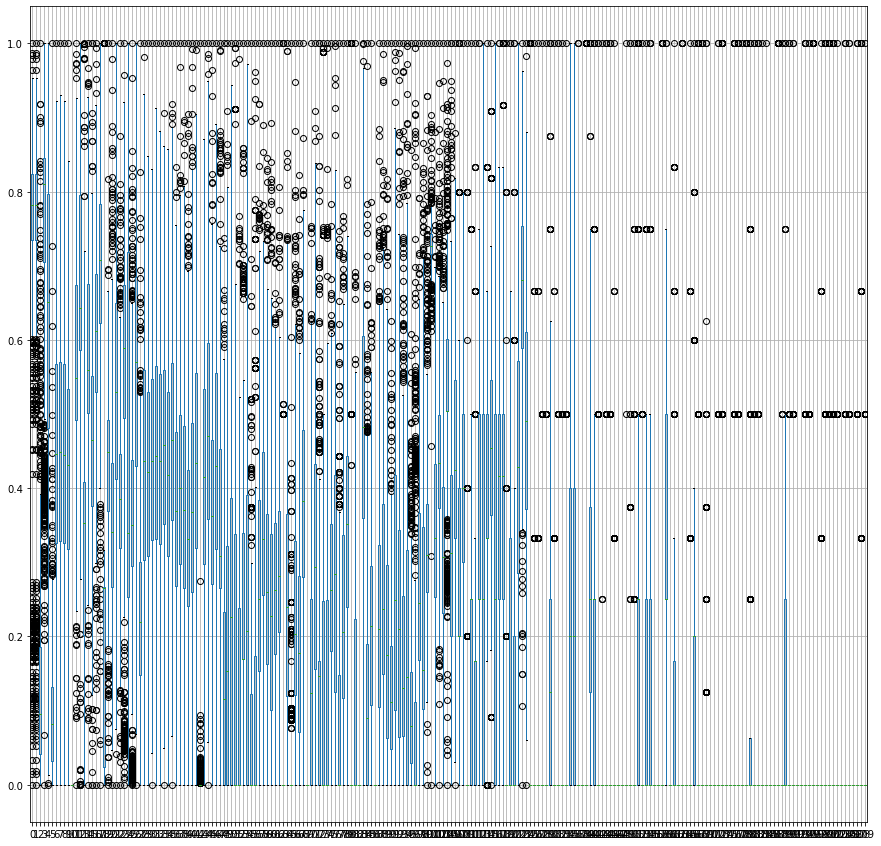

In [101]:
scaling=StandardScaler()
scaling.fit(descriptor_data)
Scaled_data=scaling.transform(descriptor_data)
pd.DataFrame(Scaled_data).boxplot(figsize=(15,15))

try minmax scaling


<AxesSubplot:>

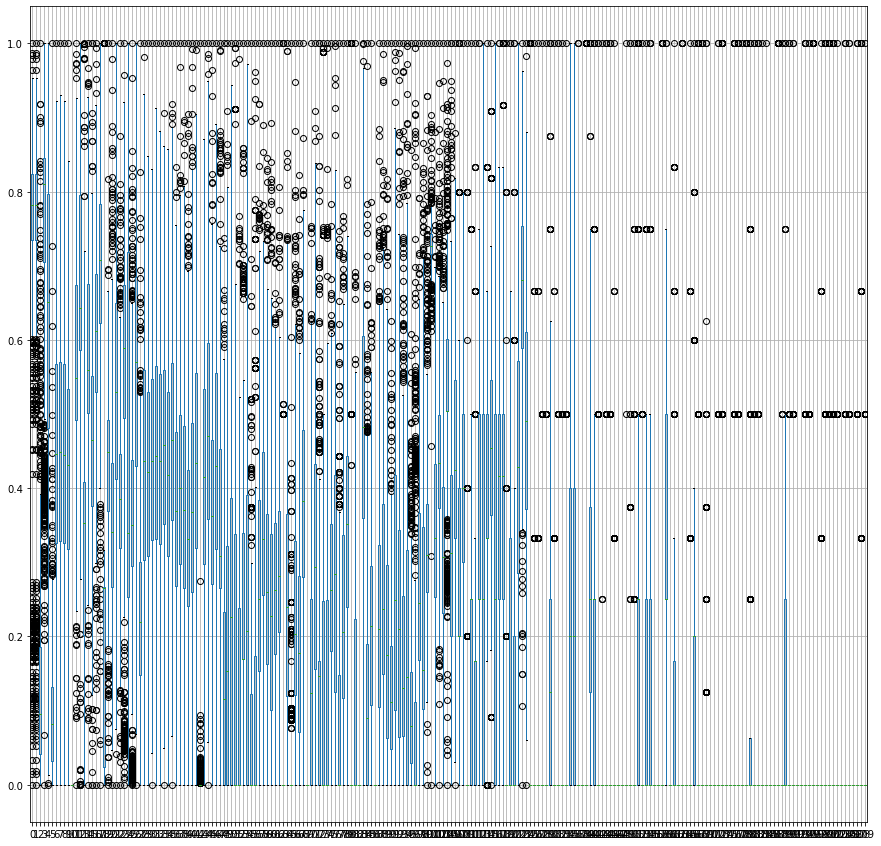

In [108]:
scaling=MinMaxScaler()
scaling.fit(descriptor_data)
Scaled_data_2=scaling.transform(descriptor_data)
pd.DataFrame(Scaled_data_2).boxplot(figsize=(15,15))

## Execute PCA

In [109]:
pca=PCA()
transformed_data=pca.fit_transform(Scaled_data_2)
variances=pd.DataFrame(pca.explained_variance_ratio_*100)
variances.index+=1
variances.head(20)

,0
1,18.366555
2,8.846076
3,6.206031
4,5.709057
5,4.546802
6,4.016595
7,3.677574
8,3.242985
9,2.670253
10,2.297767


Visualise cumulative variance

Text(0, 66, '65% variance')

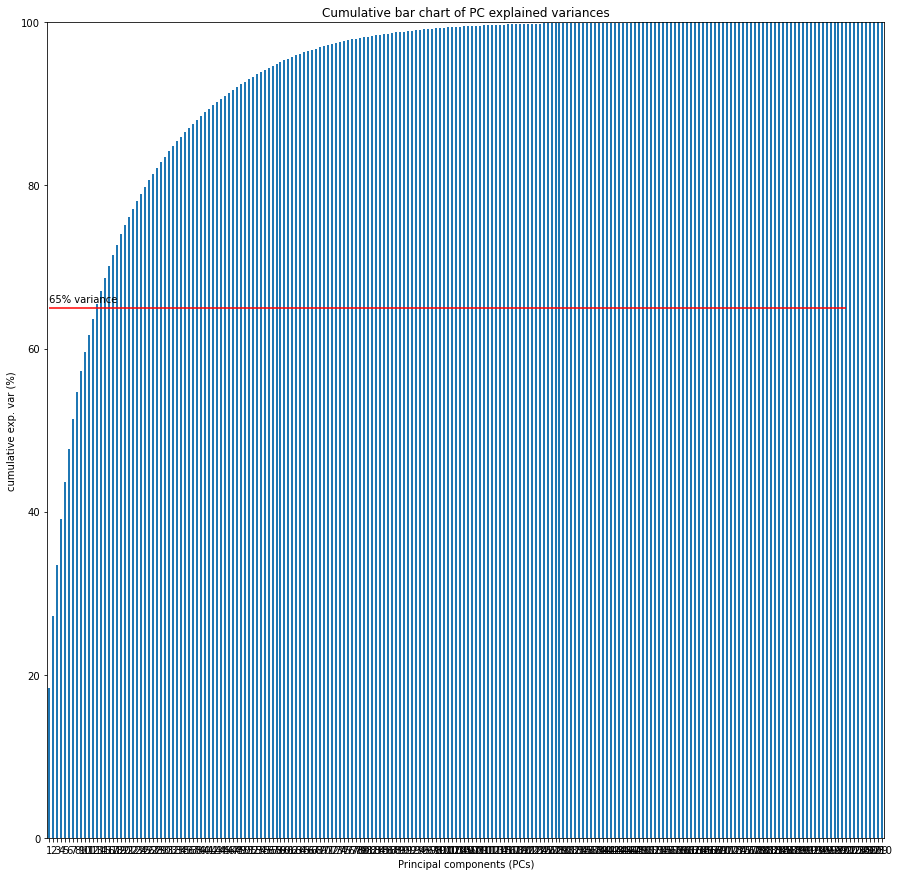

In [110]:
cumulative_variances=variances.cumsum()
cumulative_variances.plot.bar(rot=0,legend=False,figsize=(15,15),ylim=(0,100))
plt.title('Cumulative bar chart of PC explained variances')
plt.ylabel('cumulative exp. var (%)')
plt.xlabel('Principal components (PCs)')
plt.hlines(xmin=0,xmax=200,y=65,color='RED')
plt.text(0, 66, '65% variance', ha='left', va='center')

In [111]:
cumulative_variances.head(20) #13 PCs

,0
1,18.366555
2,27.212631
3,33.418661
4,39.127718
5,43.674520
6,47.691116
7,51.368690
8,54.611675
9,57.281927
10,59.579695


## loadings

Plot loadings for PC1 and PC2

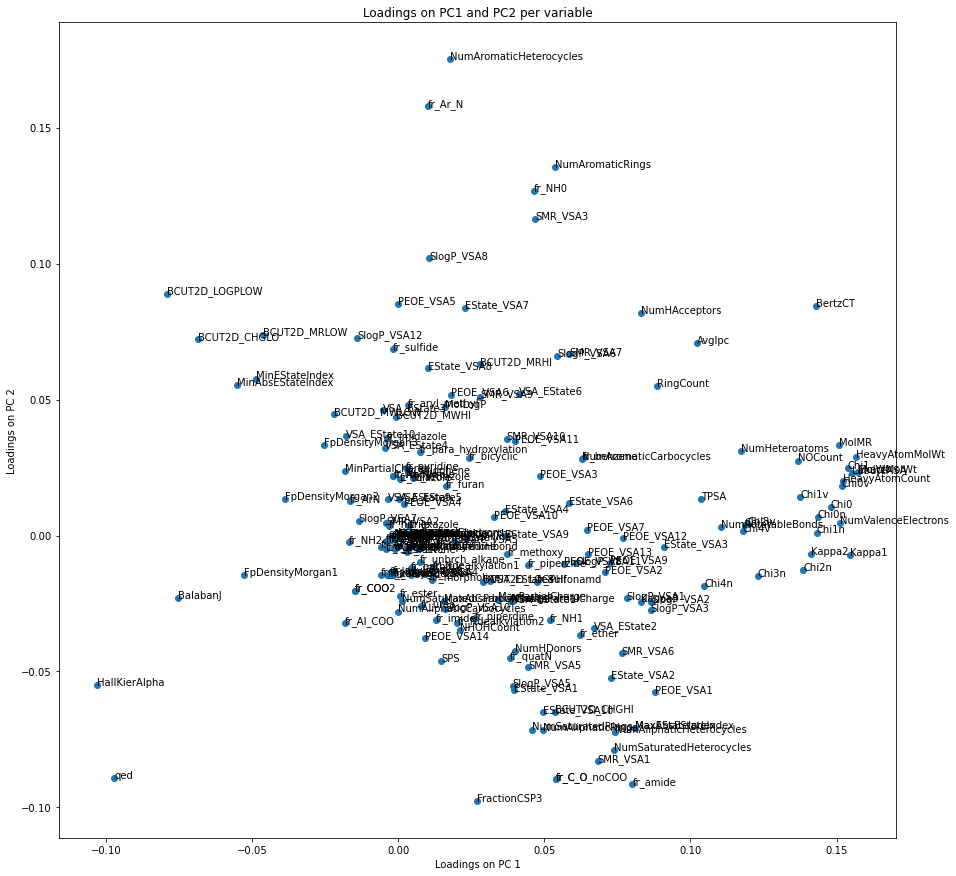

In [112]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings,index=descriptor_data.columns,columns=list(range(1,len(variances)+1)))

PC1_loadings=loading_matrix[1]
PC2_loadings=loading_matrix[2]
labels=descriptor_data.columns
fig,ax=plt.subplots(figsize=(15,15))
ax.scatter(x=PC1_loadings,y=PC2_loadings)
ax.set_xlabel('Loadings on PC 1')
ax.set_ylabel('Loadings on PC 2')
ax.set_title('Loadings on PC1 and PC2 per variable')
for i in range(len(labels)):
    ax.annotate(labels[i],(PC1_loadings[i],PC2_loadings[i]))

In [113]:
list_of_descriptors=[]
countings={}
for PC in range(1,200):
    descriptors=loading_matrix[abs(loading_matrix[PC])>0.05][PC].index
    for descriptor in descriptors:
        if descriptor not in countings.keys():
            countings[descriptor]=float(abs(loading_matrix[loading_matrix.index==descriptor][PC]))*variances.iloc[PC-1]
        countings[descriptor]+=float(abs(loading_matrix[loading_matrix.index==descriptor][PC]))*variances.iloc[PC-1]
        if descriptor not in list_of_descriptors:
            list_of_descriptors.append(descriptor)
pd.DataFrame.from_dict(countings,orient='index').sort_values(by=0,ascending=False).head(20)


,0
BertzCT,6.000217
ExactMolWt,5.778223
MolWt,5.776763
HeavyAtomMolWt,5.760554
LabuteASA,5.708652
Kappa1,5.677265
Chi1,5.650271
HeavyAtomCount,5.584699
Chi0v,5.573450
NumValenceElectrons,5.558871
